In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

pd.set_option('display.max_rows', 100)
sns.set_context('notebook')

In [2]:
def detect_activity(row, activity_list):
    new_row = row
    mask = [1 if activity in row["activities"] else 0 for activity in activity_list]
    new_row[3:] = mask
    return new_row

daylio = pd.read_csv(
    "data/daylio.csv",
    usecols=["full_date", "weekday", "mood", "activities"],
    index_col="full_date",
    parse_dates=True,
)
# parse activities
unique_activities = (
    daylio["activities"].str.split(r"\s*\|\s*", expand=True).stack().unique()
)
daylio["activities"] = daylio.activities.apply(lambda x: x.split(" | "))
for activity in unique_activities:
    daylio[activity] = 0
daylio = daylio.apply(lambda x: detect_activity(x, unique_activities), axis=1)
daylio.drop(columns="activities", inplace=True)
# convert moods to ordinal
mood_map = {"awful": -2, "bad": -1, "meh": 0, "good": 1, "rad": 2}
inv_mood_map = {v:k for k,v in mood_map.items()}
daylio.mood =  daylio.mood.map(mood_map)

# reverse direction so index 0 is the oldest date
daylio = daylio.reindex(index=daylio.index[::-1])

/var/folders/my/lvxg1n852nq3vf2vvjqcrzp80000gn/T/ipykernel_29519/1839680483.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  daylio[activity] = 0
/var/folders/my/lvxg1n852nq3vf2vvjqcrzp80000gn/T/ipykernel_29519/1839680483.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  daylio[activity] = 0
/var/folders/my/lvxg1n852nq3vf2vvjqcrzp80000gn/T/ipykernel_29519/1839680483.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

In [3]:
daylio = daylio.loc['2020-07-22':]

In [4]:
# starts on a wednesday, ends on a saturday
headache_np = daylio.Headache.to_numpy()

total_days = len(headache_np)

# add monday tuesday at beginning
total_days += 2
# add sunday at the end
total_days += 1

# do the same to the headache_np array
headache_np = np.concatenate((np.full(2, np.nan), headache_np, np.full(1, np.nan)))

In [5]:
weekly_headache = headache_np.reshape(-1, 7)
weekly_headache = weekly_headache.T

In [6]:
headaches_2020 = weekly_headache[:, :-(52*2)]
headaches_2021 = weekly_headache[:, -(52*2):-52]
headaches_2022 = weekly_headache[:, -52:]

# pad the rest of headaches 2020 with NaN:
headaches_2020 = np.hstack((np.full((7, 52 - 24), np.nan), headaches_2020))

In [7]:
headaches_2022.shape

(7, 52)

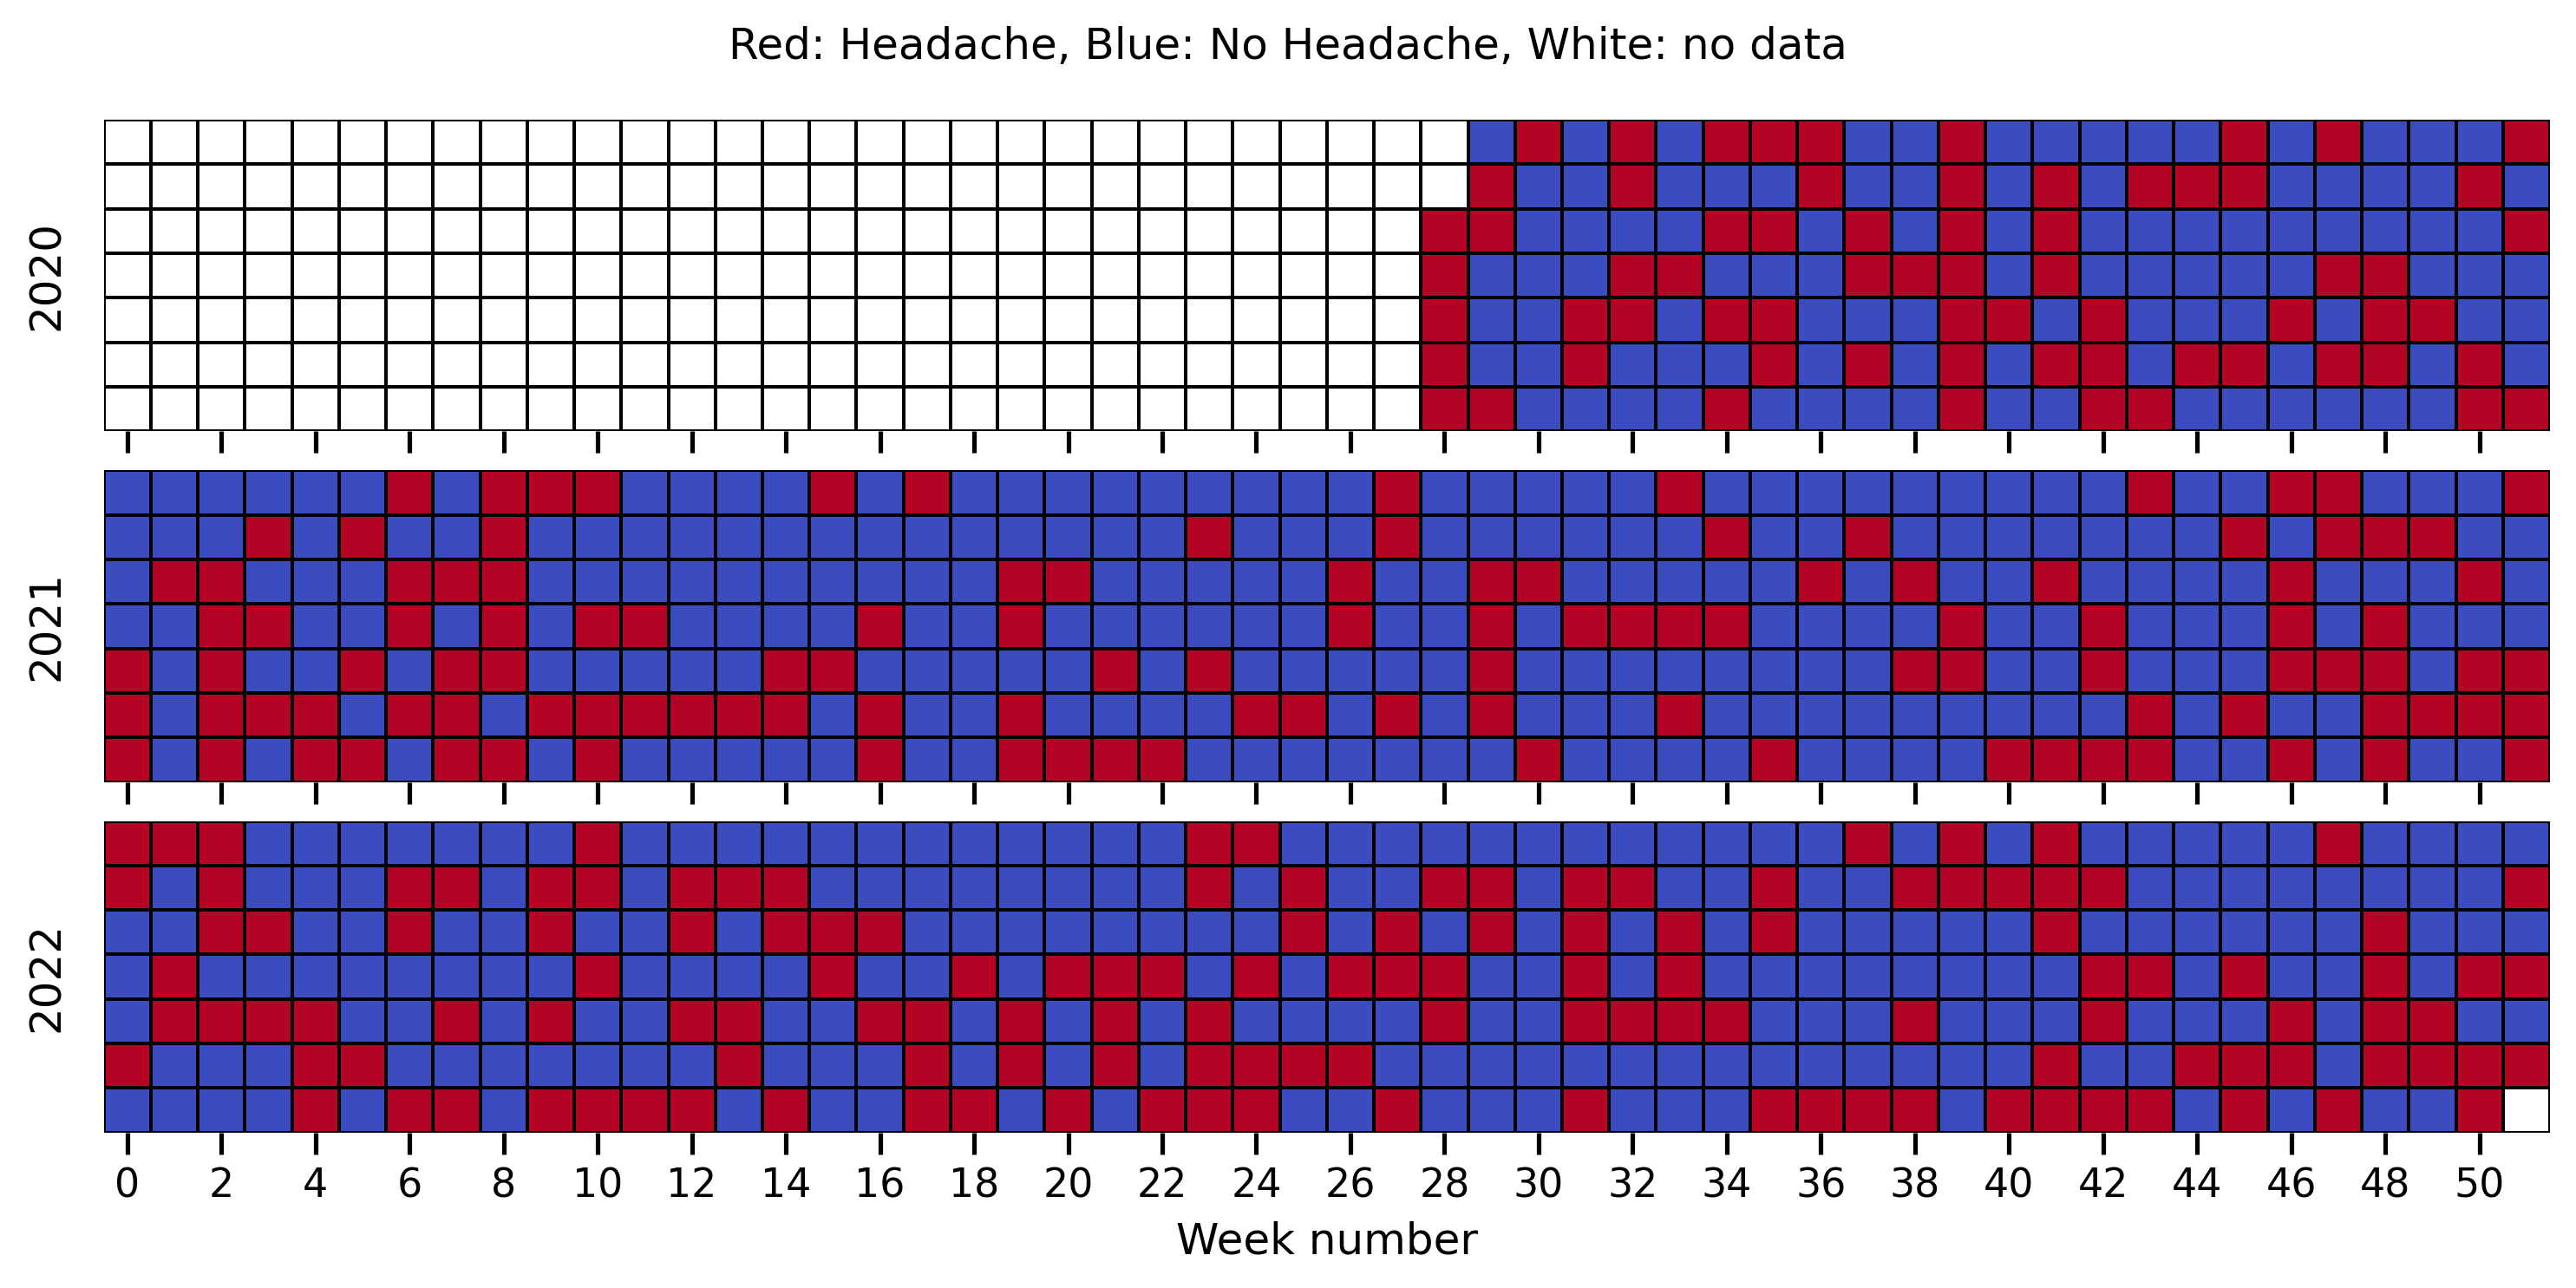

In [8]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 5), dpi=300, sharex=True)

ax1 = sns.heatmap(
    headaches_2020,
    cmap="coolwarm",
    cbar=False,
    ax=ax1,
    linecolor="black",
    linewidth=0.5,
)
ax1.set_yticks([])
ax1.set_ylabel("2020")

ax2 = sns.heatmap(
    headaches_2021,
    cmap="coolwarm",
    cbar=False,
    ax=ax2,
    linecolor="black",
    linewidth=0.5,
)
ax2.set_yticks([])
ax2.set_ylabel("2021")

ax3 = sns.heatmap(
    headaches_2022,
    cmap="coolwarm",
    cbar=False,
    ax=ax3,
    linecolor="black",
    linewidth=0.5,
)
ax3.set_yticks([])
ax3.set_ylabel("2022")

ax3.set_xlabel("Week number")

f.suptitle("Red: Headache, Blue: No Headache, White: no data")
f.set_tight_layout(True)
plt.savefig(
    "/Users/thesofakillers/Desktop/headaches.png",
    dpi=300,
    bbox_inches="tight",
    transparent=False,
    facecolor="white",
)
plt.show()

In [9]:
headache_p_week_2020 = np.nanmean(headaches_2020.sum(axis=0))

headache_p_week_2021 = np.nanmean(headaches_2021.sum(axis=0))
total_headaches_2021 = np.nansum(headaches_2021)

headache_p_week_2022 = np.nanmean(headaches_2022.sum(axis=0))
total_headaches_2022 = np.nansum(headaches_2022)


In [10]:
print(f"In 2020, I had {headache_p_week_2020:.2f} headaches per week on average")

In 2020, I had 2.65 headaches per week on average


In [11]:
print(f"In 2021, I had {headache_p_week_2021:.2f} headaches per week on average.")
print(f"In total, I had a headache on {total_headaches_2021} days of 2021.")
print(f"That's {total_headaches_2021/364 * 100:.2f}% of the year.")

In 2021, I had 2.31 headaches per week on average.
In total, I had a headache on 120.0 days of 2021.
That's 32.97% of the year.


In [12]:
print(f"In 2022, I had {headache_p_week_2022:.2f} headaches per week on average.")
print(f"In total, I had a headache on {total_headaches_2022} days of 2022.")
print(f"That's {total_headaches_2022/364 * 100:.2f}% of the year.")

In 2022, I had 2.61 headaches per week on average.
In total, I had a headache on 136.0 days of 2022.
That's 37.36% of the year.
